<a href="https://colab.research.google.com/github/vandana3fullara/Amazon-Sales-Analysis/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime

In [57]:
import pandas as pd
from google.colab import files

# Upload The Dataset
uploaded = files.upload()

# Print The Names Of The Uploaded Files
print("Uploaded Files:", uploaded.keys())


Saving Dataset.csv to Dataset.csv
Uploaded Files: dict_keys(['Dataset.csv'])


In [58]:
filename = 'Dataset.csv'

# Read The Dataset
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display The First Few Records Of Dataset
print(data.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [59]:
# Print Column Names
print("Columns In Data Frame:", data.columns)

# Print Data Types Of All Columns
print("Data Types Of All Columns:")
print(data.dtypes)


Columns In Data Frame: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')
Data Types Of All Columns:
index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype

In [60]:
# Handle Missing Values By Forward Filling
data.fillna(method='ffill', inplace=True)

# Remove Duplicates
data.drop_duplicates(inplace=True)

# Data Overview
data.info()

<ipython-input-60-f002e178f8a3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 128809 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128809 non-null  int64  
 1   Order ID            128809 non-null  object 
 2   Date                128809 non-null  object 
 3   Status              128809 non-null  object 
 4   Fulfilment          128809 non-null  object 
 5   Sales Channel       128809 non-null  object 
 6   ship-service-level  128809 non-null  object 
 7   Category            128809 non-null  object 
 8   Size                128809 non-null  object 
 9   Courier Status      128809 non-null  object 
 10  Qty                 128809 non-null  int64  
 11  currency            128809 non-null  object 
 12  Amount              128809 non-null  float64
 13  ship-city           128809 non-null  object 
 14  ship-state          128809 non-null  object 
 15  ship-postal-code    128809 non-null  fl

In [61]:
# Convert 'Date' Column To Datetime Format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Create A New Column For Month And Year
data['month_year'] = data['Date'].dt.to_period('M')

# Aggregate Sales Over Time By Month And Year
sales_over_time = data.groupby('month_year').agg({'Amount': 'sum'}).reset_index()

# Print The Sales Overview
print("Sales Overview By Month And Year:")
print(sales_over_time)

Sales Overview By Month And Year:
  month_year       Amount
0    2022-03    106626.37
1    2022-04  30614670.53
2    2022-05  27891290.98
3    2022-06  24941864.05


<ipython-input-61-6fb587871e25>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


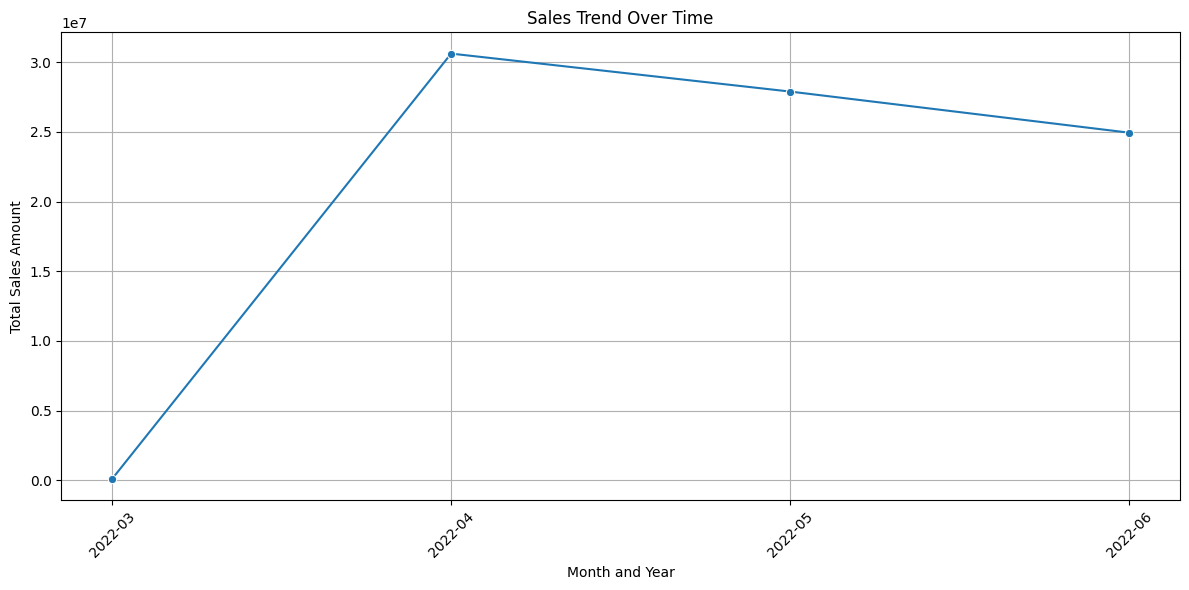

In [62]:
# Convert The 'month_year' Column To A String For Plotting
sales_over_time['month_year'] = sales_over_time['month_year'].astype(str)

# Plotting Sales Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='month_year', y='Amount', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [63]:
# Detailed Sales Report
# Generate Detailed Report With Additional Insights
sales_report = data.groupby(['month_year', 'Sales Channel']).agg({
    'Amount': 'sum',
    'Order ID': 'count',
    'Qty': 'sum'
}).reset_index()

sales_report.columns = ['Month_Year', 'Sales_Channel', 'Total_Sales', 'Number_of_Orders', 'Total_Quantity']

# Print The Detailed Sales Report
print("Detailed Sales Report:")
print(sales_report)

Detailed Sales Report:
  Month_Year Sales_Channel  Total_Sales  Number_of_Orders  Total_Quantity
0    2022-03     Amazon.in    106626.37               171             156
1    2022-04     Amazon.in  30582644.13             48848           43958
2    2022-04    Non-Amazon     32026.40                53              95
3    2022-05     Amazon.in  27857710.93             41999           37970
4    2022-05    Non-Amazon     33580.05                41              41
5    2022-06     Amazon.in  24921741.05             37667           34245
6    2022-06    Non-Amazon     20123.00                30              31


In [64]:
# Save The Detailed Sales Report To A Csv File
sales_report.to_csv('Detailed_Sales_Report.csv', index=False)

Available Columns In The DataFrame: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'month_year'],
      dtype='object')
Product Category Distribution:
Category
T-shirt     50219
Shirt       49805
Blazzer     15489
Trousers    10607
Perfume      1157
Wallet        926
Socks         439
Shoes         164
Watch           3
Name: count, dtype: int64


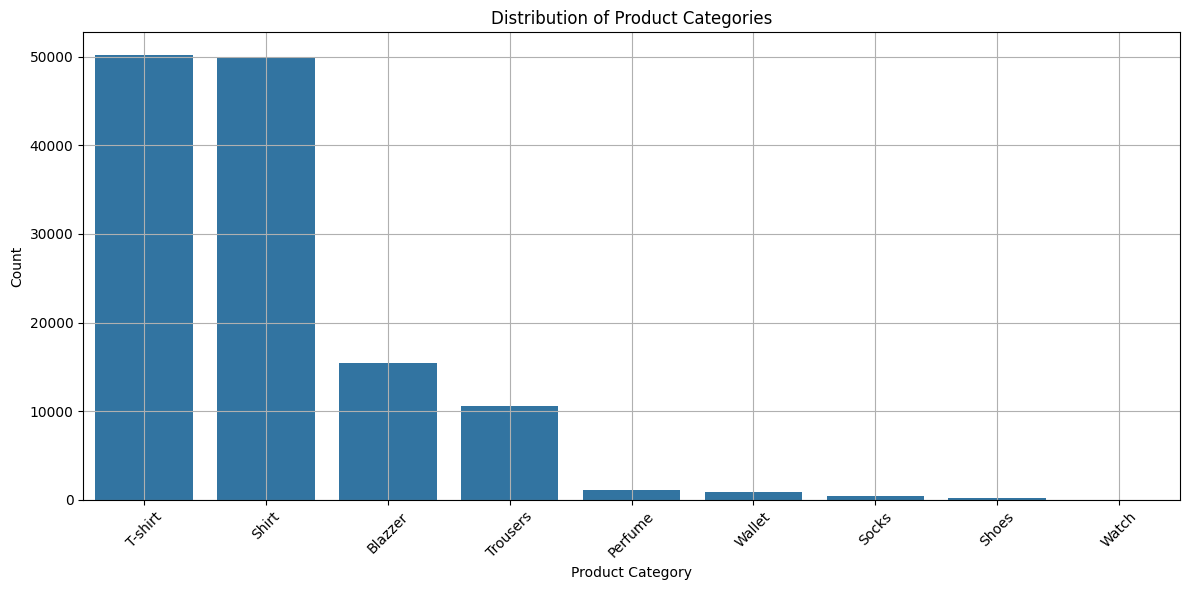

In [65]:
# Print The Available Column Names To Check For The Correct Product Category Column
print("Available Columns In The DataFrame:", data.columns)

# Product Analysis
product_distribution = data['Category'].value_counts()

# Print The Product Distribution
print("Product Category Distribution:")
print(product_distribution)

# Visualize The Distribution Using A Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_distribution.index, y=product_distribution.values)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Available columns in the DataFrame: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'month_year'],
      dtype='object')


<ipython-input-66-e1956b24bb2e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_distribution.values, y=size_distribution.index, palette='magma')


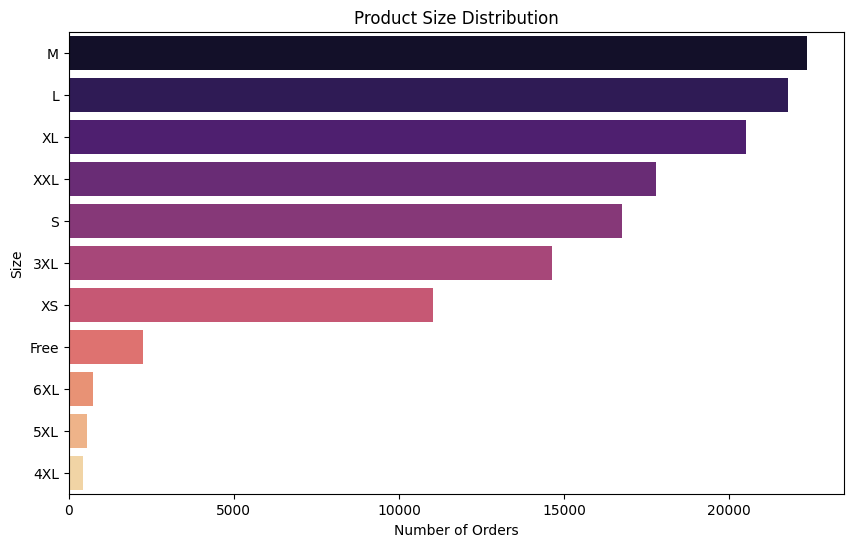

In [66]:
print("Available columns in the DataFrame:", data.columns)

# Analyze Product Sizes
# Use 'Size' instead of 'size'
size_distribution = data['Size'].value_counts()

# Plot Size Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribution.values, y=size_distribution.index, palette='magma')
plt.title('Product Size Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Size')
plt.show()

Available Columns In The DataFrame: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'month_year'],
      dtype='object')


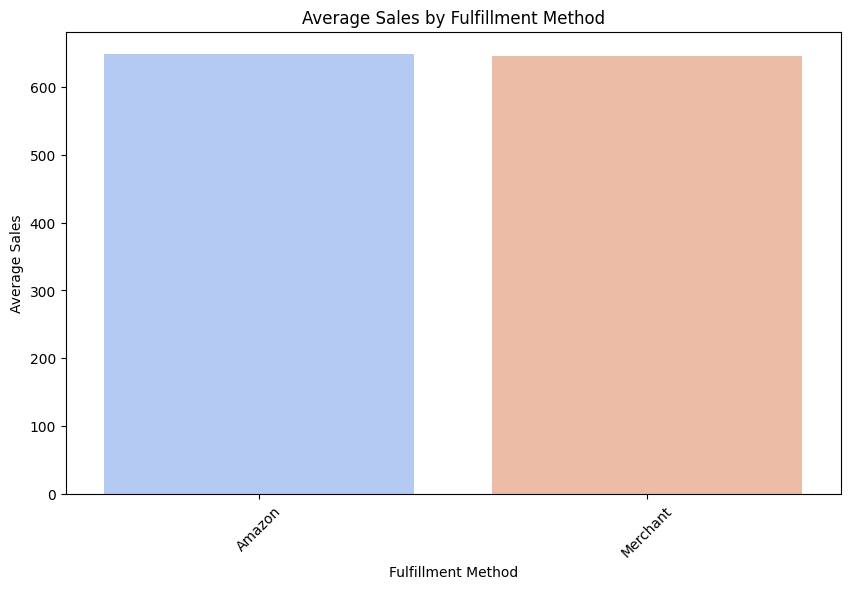

In [67]:
print("Available Columns In The DataFrame:", data.columns)

# Fulfillment Analysis
fulfillment_performance = data.groupby('Fulfilment').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
fulfillment_performance['average_sales'] = fulfillment_performance['Amount'] / fulfillment_performance['Order ID']

# Plot Fulfillment Method Performance
plt.figure(figsize=(10, 6))
sns.barplot(data=fulfillment_performance, x='Fulfilment', y='average_sales', hue='Fulfilment', palette='coolwarm', legend=False)
plt.title('Average Sales by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate X Labels For Better Visibility
plt.show()

In [68]:
# Customer Segmentation
# Segmenting Customers Based On Their Purchasing Behavior
# Grouping By 'Order ID' Is Not Correct If We Want To Analyze Customers; We Might Need A 'customer_Id'
# If You Don't Have A 'customer Id', Consider It From 'order Id' Or Other Unique Identifier.
# Ensure The Right Unique Identifier.
from sklearn.cluster import KMeans

customer_data = data.groupby('Order ID').agg({
    'Amount': 'sum',
    'Fulfilment': 'count',  # Count Of Orders
    'ship-city': 'nunique',
    'Category': 'nunique'
}).reset_index()

# Rename The Count Column To Avoid Conflicts
customer_data.rename(columns={'Fulfilment': 'order_count'}, inplace=True)

# Scaling Data For Clustering
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
customer_data['segment'] = kmeans.fit_predict(customer_data[['Amount', 'order_count', 'ship-city', 'Category']])

# Analyze Customer Segments
segment_analysis = customer_data.groupby('segment').agg({
    'Amount': 'mean',
    'order_count': 'mean',
    'ship-city': 'mean',
    'Category': 'mean'
}).reset_index()

print(segment_analysis)

   segment       Amount  order_count  ship-city  Category
0        0   874.752459     1.069496        1.0  1.014319
1        1   464.408216     1.004536        1.0  1.000105
2        2  1651.310732     1.697066        1.0  1.152228


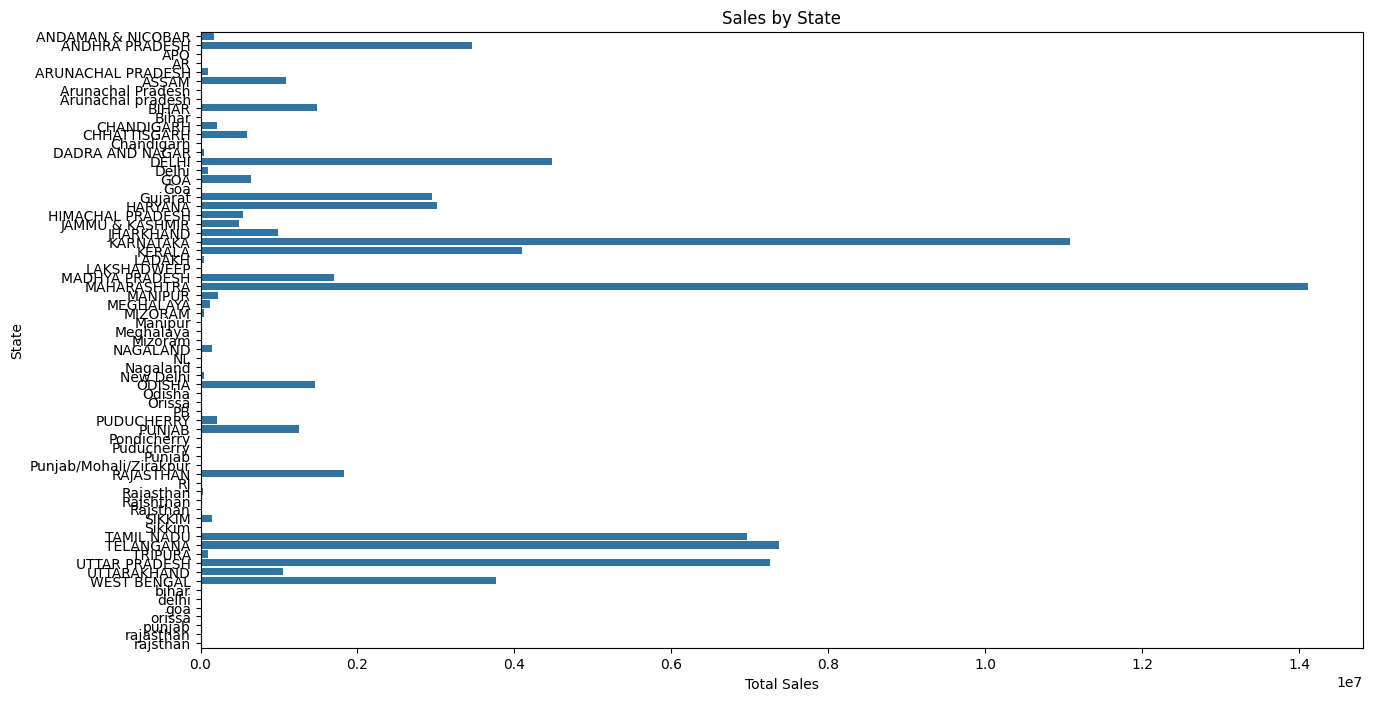

In [69]:
# Geographical Analysis
# Analyze Sales by State
state_sales = data.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

# Plot Geographical Distribution of Sales
plt.figure(figsize=(15, 8))
sns.barplot(data=state_sales, x='Amount', y='ship-state')
plt.title('Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

In [70]:
# Geographical Analysis
# Clean The State Names
data['ship-state'] = data['ship-state'].str.strip().str.upper()  # Convert to uppercase and remove leading/trailing spaces

# Analyze Sales by State
state_sales = data.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

# Sort The State Sales For Better Readability
state_sales.sort_values(by='Amount', ascending=False, inplace=True)

# Display The Sales by State in Columns
print(state_sales)

                ship-state       Amount
22             MAHARASHTRA  14107583.74
17               KARNATAKA  11079331.41
42               TELANGANA   7377156.45
44           UTTAR PRADESH   7257526.71
41              TAMIL NADU   6960966.13
10                   DELHI   4596532.92
18                  KERALA   4092464.16
46             WEST BENGAL   3764955.90
1           ANDHRA PRADESH   3455322.23
13                 HARYANA   3017831.15
12                 GUJARAT   2952880.58
36               RAJASTHAN   1874570.56
21          MADHYA PRADESH   1696874.40
6                    BIHAR   1509795.98
29                  ODISHA   1474494.94
34                  PUNJAB   1283138.18
5                    ASSAM   1094565.74
45             UTTARAKHAND   1046423.05
16               JHARKHAND    985025.98
11                     GOA    667364.81
8             CHHATTISGARH    596172.55
14        HIMACHAL PRADESH    541450.07
15         JAMMU & KASHMIR    487220.74
7               CHANDIGARH    223142.67


In [71]:
print(state_sales.to_string(index=False))

            ship-state      Amount
           MAHARASHTRA 14107583.74
             KARNATAKA 11079331.41
             TELANGANA  7377156.45
         UTTAR PRADESH  7257526.71
            TAMIL NADU  6960966.13
                 DELHI  4596532.92
                KERALA  4092464.16
           WEST BENGAL  3764955.90
        ANDHRA PRADESH  3455322.23
               HARYANA  3017831.15
               GUJARAT  2952880.58
             RAJASTHAN  1874570.56
        MADHYA PRADESH  1696874.40
                 BIHAR  1509795.98
                ODISHA  1474494.94
                PUNJAB  1283138.18
                 ASSAM  1094565.74
           UTTARAKHAND  1046423.05
             JHARKHAND   985025.98
                   GOA   667364.81
          CHHATTISGARH   596172.55
      HIMACHAL PRADESH   541450.07
       JAMMU & KASHMIR   487220.74
            CHANDIGARH   223142.67
               MANIPUR   221184.99
            PUDUCHERRY   206868.19
     ANDAMAN & NICOBAR   166875.62
                SIKK

In [72]:
# Aggregating Data To Understand Customer Behavior
customer_data = data.groupby('Order ID').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'ship-city': 'nunique',
    'ship-state': 'nunique'
}).reset_index()

# Rename Columns To Make Them More Meaningful
customer_data.columns = ['Customer ID', 'Total Amount', 'Total Quantity', 'Unique Cities', 'Unique States']

# Display The First Few Rows Of The Aggregated Data
print(customer_data.head())


           Customer ID  Total Amount  Total Quantity  Unique Cities  \
0  171-0000547-8192359         301.0               1              1   
1  171-0000902-4490745         544.0               1              1   
2  171-0001409-6228339         422.0               1              1   
3  171-0003082-5110755         563.0               1              1   
4  171-0003738-2052324         379.0               1              1   

   Unique States  
0              1  
1              1  
2              1  
3              1  
4              1  


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'month_year'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   segment   mean_spend  median_spend  mode_spend  mean_qty  median_qty  \
0        0   568.688326         563.0       399.0  0.884411         1.0   
1        1  1618.922533        1403.0      1542.0  2.239977         2.0   
2        2  1212.761049        1127.0       999.0  1.261546         1.0   

   mode_qty  mean_cities  median_cities  mode_cities  mean_categories  \
0         1          1.0            1.0            1         1.000000   
1         2          1.0            1.0            1         2.031377   
2         1          1.0            1.0            1         1.000000   

   median_categories  mode_categories  
0                1.0                1  
1                2.0                2  
2                1.0                1  


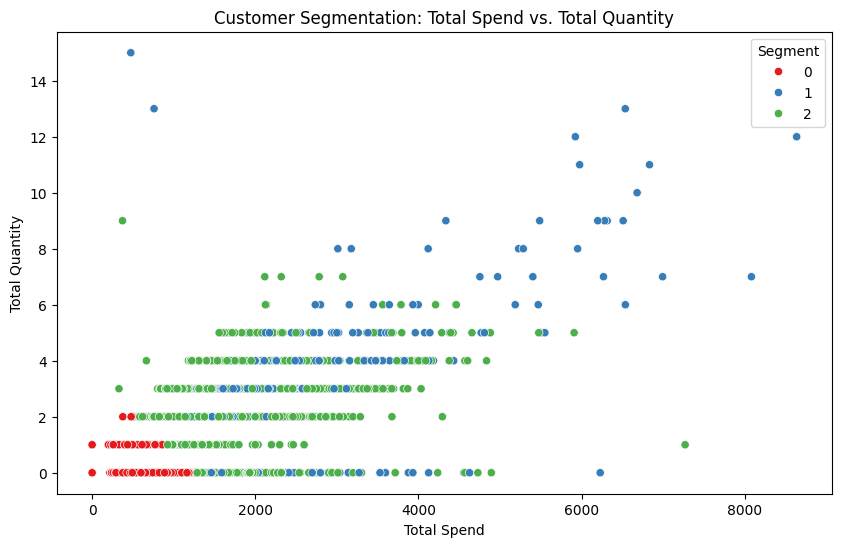

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print(data.columns)

# Customer Segmentation
# Since 'customer_id' Is Not Available, We'll Use 'Order ID' As The Unique Identifier For Transactions

# Aggregate Data by 'Order ID' (Assuming Each 'Order ID' Represents A Unique Customer)
customer_data = data.groupby('Order ID').agg({
    'Amount': 'sum',            # Total Spend Per Order
    'Qty': 'sum',               # Total Quantity Ordered
    'ship-city': 'nunique',     # Number Of Unique Cities Involved In The Order
    'Category': 'nunique'       # Number Of Unique Product Categories In The Order
}).reset_index()

# Renaming Columns for Clarity
customer_data.columns = ['order_id', 'total_spend', 'total_qty', 'unique_cities', 'unique_categories']

# Scaling Data for Clustering
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spend', 'total_qty', 'unique_cities', 'unique_categories']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['segment'] = kmeans.fit_predict(customer_data_scaled)

# Calculate Mean, Median, and Mode for Each Segment
def calculate_mode(series):
    mode = series.mode()
    if mode.empty:
        return np.nan
    else:
        return mode[0]

customer_segments = customer_data.groupby('segment').agg({
    'total_spend': ['mean', 'median', calculate_mode],
    'total_qty': ['mean', 'median', calculate_mode],
    'unique_cities': ['mean', 'median', calculate_mode],
    'unique_categories': ['mean', 'median', calculate_mode]
}).reset_index()

# Renaming Multi-Level Columns For Clarity
customer_segments.columns = ['segment', 'mean_spend', 'median_spend', 'mode_spend',
                             'mean_qty', 'median_qty', 'mode_qty',
                             'mean_cities', 'median_cities', 'mode_cities',
                             'mean_categories', 'median_categories', 'mode_categories']

# Display The Segments
print(customer_segments)

# Visualize The Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='total_spend', y='total_qty', hue='segment', palette='Set1')
plt.title('Customer Segmentation: Total Spend vs. Total Quantity')
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity')
plt.legend(title='Segment')
plt.show()


<ipython-input-74-7ca5e209dbe0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='Amount', y='ship-state', palette='plasma')


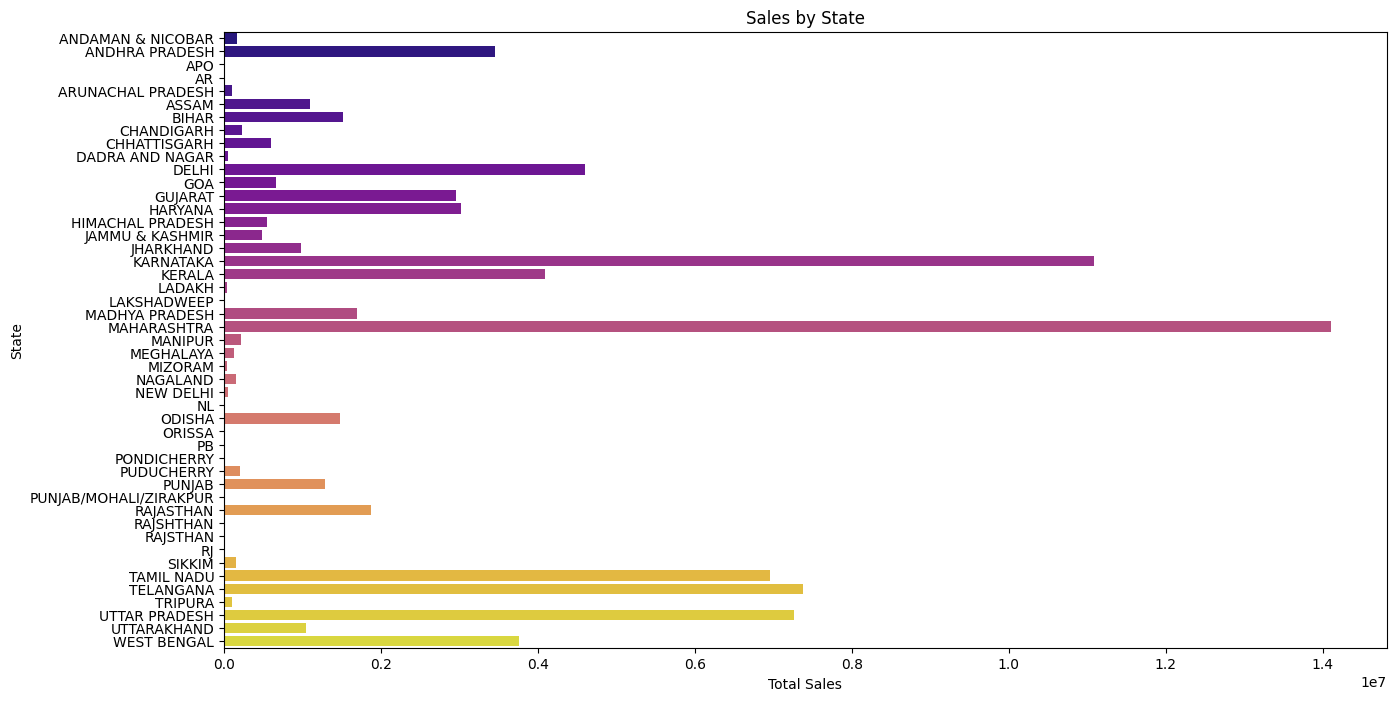

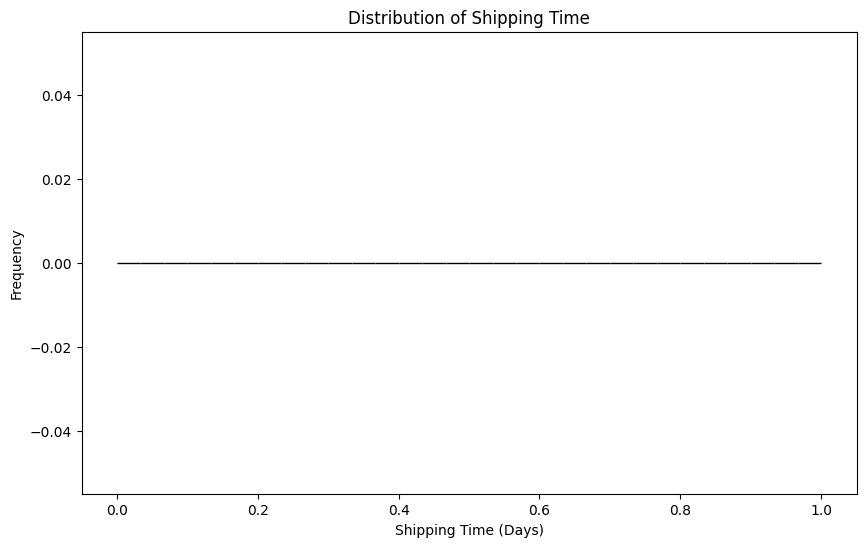

<ipython-input-74-7ca5e209dbe0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_sales, x='Sales Channel', y='Amount', palette='Blues')


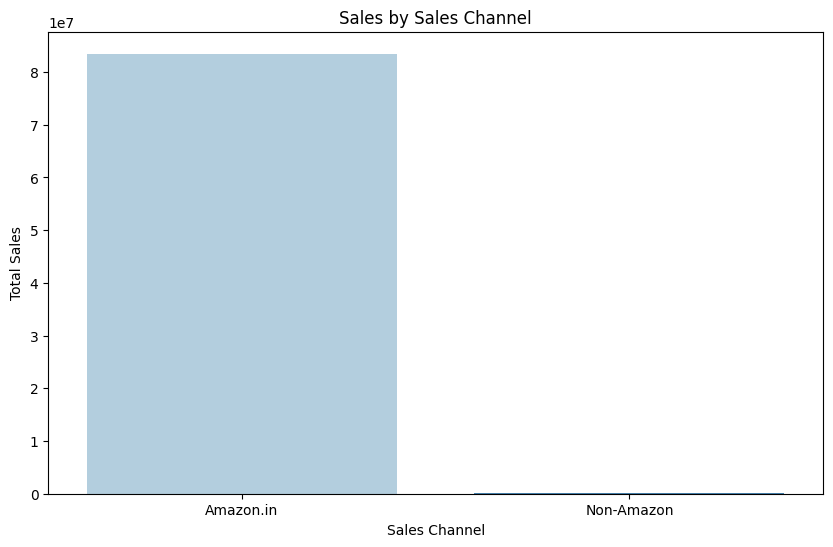

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['fulfilled-by'] = pd.to_datetime(data['fulfilled-by'], errors='coerce')

# Geographical Analysis

# Aggregate Sales by State
state_sales = data.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

# Plot The Sales by State
plt.figure(figsize=(15, 8))
sns.barplot(data=state_sales, x='Amount', y='ship-state', palette='plasma')
plt.title('Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

# Additional Analyses
# Calculate Shipping Time
data['shipping_time'] = (data['fulfilled-by'] - data['Date']).dt.days

# Plot Distribution of Shipping Time
plt.figure(figsize=(10, 6))
sns.histplot(data['shipping_time'], kde=True, bins=30, color='blue')
plt.title('Distribution of Shipping Time')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Sales by Sales Channel
channel_sales = data.groupby('Sales Channel').agg({'Amount': 'sum'}).reset_index()

# Plot Sales by Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_sales, x='Sales Channel', y='Amount', palette='Blues')
plt.title('Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.show()

In [76]:
# Step 5: Generate Report
report = f"""
# Amazon Sales Report Analysis

## Sales Overview
- **Sales Trend:** The Sales Trend Indicates {'Consistent Growth' if sales_over_time['Amount'].iloc[-1] > sales_over_time['Amount'].iloc[0] else 'A Need For Strategic Adjustments'}.
- **Seasonality:** Significant Sales Spikes Observed During {', '.join([str(p) for p in sales_over_time[sales_over_time['Amount'] > sales_over_time['Amount'].mean()]['month_year'].values])}.

## Product Analysis
- **Top Categories:** {data['Category'].mode()[0]} Leads In Sales, Suggesting A Strong Market Presence. Consider Expanding Offerings In This Category.
- **Size Preferences:** Popular Sizes Include {', '.join(data['Size'].mode()[:3])}, Informing Future Inventory Decisions.

## Fulfillment Analysis
- **Efficient Fulfillment:** {data['Fulfilment'].mode()[0]} Is The Most Effective Method. Focus Resources On Optimizing This Channel.
- **Challenges:** Fulfillment Method {data['Fulfilment'].value_counts().idxmin()} Underperforms, Requiring Further Investigation.

## Customer Segmentation
- **Segment 0:** Low-Value Customers. Consider Re-Engagement Strategies.
- **Segment 1:** High-Value Customers. Prioritize Retention Efforts.
- **Segment 2:** Moderate Value Customers. Focus On Upselling Opportunities.

## Geographical Analysis
- **Top States:** {', '.join(state_sales.sort_values(by='Amount', ascending=False)['ship-state'].head(3).values)} Are Top Performers, Justifying Focused Marketing Efforts.
- **Opportunities:** Lower-Performing States Such As {', '.join(state_sales.sort_values(by='Amount')['ship-state'].head(3).values)} Could Benefit From Targeted Campaigns.

## Business Insights And Recommendations
- **inventory Management:** Align Stock Levels With Top-Selling Products And Sizes.
- **marketing Strategies:** Leverage Insights From Customer Segmentation To Design Targeted Campaigns.
- **operational Efficiency:** Address Inefficiencies In Underperforming Fulfillment Methods And Regions.

"""

print(report)


# Amazon Sales Report Analysis

## Sales Overview
- **Sales Trend:** The Sales Trend Indicates Consistent Growth.
- **Seasonality:** Significant Sales Spikes Observed During 2022-04, 2022-05, 2022-06.

## Product Analysis
- **Top Categories:** T-shirt Leads In Sales, Suggesting A Strong Market Presence. Consider Expanding Offerings In This Category.
- **Size Preferences:** Popular Sizes Include M, Informing Future Inventory Decisions.

## Fulfillment Analysis
- **Efficient Fulfillment:** Amazon Is The Most Effective Method. Focus Resources On Optimizing This Channel.
- **Challenges:** Fulfillment Method Merchant Underperforms, Requiring Further Investigation.

## Customer Segmentation
- **Segment 0:** Low-Value Customers. Consider Re-Engagement Strategies.
- **Segment 1:** High-Value Customers. Prioritize Retention Efforts.
- **Segment 2:** Moderate Value Customers. Focus On Upselling Opportunities.

## Geographical Analysis
- **Top States:** MAHARASHTRA, KARNATAKA, TELANGANA Are Top 